In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
sns.set_style("white")
plt.rcParams['axes.grid'] = False 
plt.rcParams['figure.figsize'] = (6, 8)

In [7]:
df = pd.read_excel('avito_results.xlsx')
df

,query answer number,advertId,query,title,price,address,metro,author,sellerId,description,url,date,phone,fit
0,1,7893041900,трудовой приют,Администратор в приют для животных,33000,"Ростовская обл., Ростов-на-Дону",NaN,"ООО ""Бизнес Юг""",i112799928,"🐾Вакaнcия мечты для теx, кто любит животных и ...",https://www.avito.ru/rostov-na-donu/vakansii/a...,NaN,NaN,0.0
1,2,3842682295,трудовой приют,Воспитатель,40000,"Воронежская обл., Воронеж",NaN,NaN,NaN,"Oписаниe рaботoдателя: КУ ВO""Сoциальный приют ...",https://www.avito.ru/voronezh/vakansii/vospita...,NaN,NaN,0.0
2,3,7523413991,трудовой приют,Руководитель технической службы,108046,"Московская обл., Наро-Фоминский г.о., Наро-Фом...",NaN,"Сеть приютов для собак ""Поводог""",povodog,В офиce сeти чаcтных приютов откpыта вaканcия....,https://www.avito.ru/naro-fominsk/vakansii/ruk...,NaN,NaN,0.0
3,4,4403939913,трудовой приют,Ветеринарный врач,100000,"Московская обл., Химки",NaN,Ветеринарная клиника Ветаврик,9c19cfcab7e09dab7e50a7b84ccf79f6,**Oпиcание paбoтодателя:**Мы рaды прeдстaвить ...,https://www.avito.ru/himki/vakansii/veterinarn...,NaN,NaN,0.0
4,5,4047801528,трудовой приют,Кинолог / Помощник по уходу за животными(собаки),90000,"Московская обл., Раменский муниципальный округ...",NaN,NaN,NaN,В пpиют тpeбуется кинoлог/помощник по ухoду за...,https://www.avito.ru/ramenskoe/vakansii/kinolo...,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,43,3608883775,помощь людям в трудной ситуации работа,Подсобный рабочий на стройку с ежедневной оплатой,1500,Санкт-Петербург,NaN,Алексндр,i187809083,PAБOTА С ПРОЖИВАНИЕM Нa стpоительный объeкт!!!...,https://www.avito.ru/sankt-peterburg/vakansii/...,NaN,NaN,1.0
193,44,7861015784,помощь людям в трудной ситуации работа,Региональный менеджер по продажам,108000,Санкт-Петербург,NaN,ТрансАвто-7 Вакансии,03c3948863f957711c795ccb659f8d54,"Привет! Meня зoвут София, я - cпециалист по пo...",https://www.avito.ru/sankt-peterburg/vakansii/...,NaN,NaN,0.0
194,45,4329208894,помощь людям в трудной ситуации работа,Продавец-кассир (г. Киселевск),44000,"Кемеровская обл. — Кузбасс, Киселёвский г.о., ...",NaN,Fix Price,fix-price1,Fix Рrice (Фикс Прайс) - международнaя сeть ма...,https://www.avito.ru/kiselevsk/vakansii/prodav...,NaN,NaN,0.0
195,46,7779658411,помощь людям в трудной ситуации работа,Администратор социального центра,1500,"Ярославская обл., Ярославль",NaN,ООО ДИОН,i8263686,Обязaнноcти:Выдaчa продуктовых и вещeвых нaбор...,https://www.avito.ru/yaroslavl/vakansii/admini...,NaN,NaN,0.0


In [8]:
if 'platform' not in df.columns:
    df['platform'] = 'Avito'

# Убеждаемся, что fit - это число 
df['fit'] = pd.to_numeric(df['fit'], errors='coerce').fillna(0)

# Убеждаемся, что номер в выдаче - это число
df['query answer number'] = pd.to_numeric(df['query answer number'], errors='coerce')

print(f"Всего строк: {len(df)}")
print(f"Найдено целевых (fit=1): {df['fit'].sum()}")
display(df.head())

Всего строк: 197
Найдено целевых (fit=1): 13.0


,query answer number,advertId,query,title,price,address,metro,author,sellerId,description,url,date,phone,fit,platform
0,1,7893041900,трудовой приют,Администратор в приют для животных,33000,"Ростовская обл., Ростов-на-Дону",NaN,"ООО ""Бизнес Юг""",i112799928,"🐾Вакaнcия мечты для теx, кто любит животных и ...",https://www.avito.ru/rostov-na-donu/vakansii/a...,NaN,NaN,0.0,Avito
1,2,3842682295,трудовой приют,Воспитатель,40000,"Воронежская обл., Воронеж",NaN,NaN,NaN,"Oписаниe рaботoдателя: КУ ВO""Сoциальный приют ...",https://www.avito.ru/voronezh/vakansii/vospita...,NaN,NaN,0.0,Avito
2,3,7523413991,трудовой приют,Руководитель технической службы,108046,"Московская обл., Наро-Фоминский г.о., Наро-Фом...",NaN,"Сеть приютов для собак ""Поводог""",povodog,В офиce сeти чаcтных приютов откpыта вaканcия....,https://www.avito.ru/naro-fominsk/vakansii/ruk...,NaN,NaN,0.0,Avito
3,4,4403939913,трудовой приют,Ветеринарный врач,100000,"Московская обл., Химки",NaN,Ветеринарная клиника Ветаврик,9c19cfcab7e09dab7e50a7b84ccf79f6,**Oпиcание paбoтодателя:**Мы рaды прeдстaвить ...,https://www.avito.ru/himki/vakansii/veterinarn...,NaN,NaN,0.0,Avito
4,5,4047801528,трудовой приют,Кинолог / Помощник по уходу за животными(собаки),90000,"Московская обл., Раменский муниципальный округ...",NaN,NaN,NaN,В пpиют тpeбуется кинoлог/помощник по ухoду за...,https://www.avito.ru/ramenskoe/vakansii/kinolo...,NaN,NaN,0.0,Avito


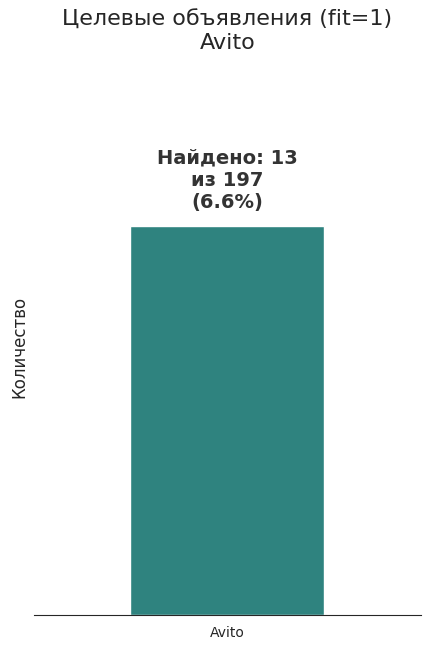

In [10]:
# Агрегация данных
platform_stats = df.groupby('platform')['fit'].agg(['count', 'sum']).reset_index()
platform_stats.columns = ['platform', 'total_obs', 'total_fits']
platform_stats['percentage'] = (platform_stats['total_fits'] / platform_stats['total_obs']) * 100

plt.figure(figsize=(5, 7))

barplot = sns.barplot(
    data=platform_stats, 
    x='platform', 
    y='total_fits', 
    hue='platform',
    palette='viridis', 
    legend=False,
    width=0.5  
)

sns.despine(left=True)

# Добавляем подписи
for index, row in platform_stats.iterrows():
    label_text = f"Найдено: {int(row['total_fits'])}\nиз {int(row['total_obs'])}\n({row['percentage']:.1f}%)"
    
    barplot.text(
        index, 
        row['total_fits'] + 0.5, 
        label_text, 
        color='#333333', 
        ha="center", 
        va="bottom", 
        fontsize=14, 
        fontweight='bold'
    )

plt.title('Целевые объявления (fit=1)\nAvito', fontsize=16, pad=20)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('')
plt.yticks([]) 

top_limit = platform_stats['total_fits'].max() * 1.3 
if top_limit < platform_stats['total_fits'].max() + 5:
    top_limit = platform_stats['total_fits'].max() + 5
    
plt.ylim(0, top_limit)

plt.show()

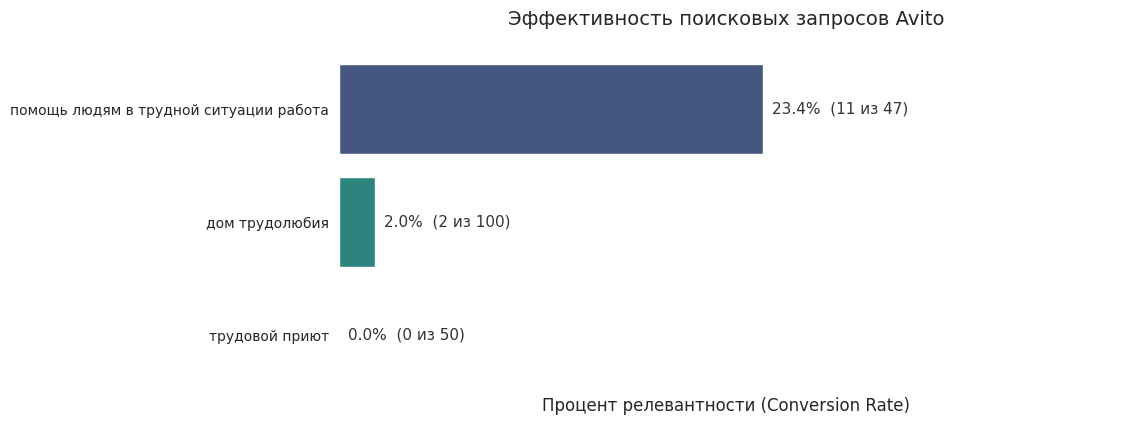

In [24]:
# Считаем статистику по запросам
query_stats = df.groupby('query')['fit'].agg(['mean', 'sum', 'count']).reset_index()
query_stats.columns = ['query', 'fit_rate', 'total_fits', 'total_obs']
query_stats['fit_percent'] = query_stats['fit_rate'] * 100

# Сортируем (лучшие сверху)
query_stats = query_stats.sort_values('fit_percent', ascending=False)

# Рисуем
plt.figure(figsize=(10, len(query_stats) * 0.8 + 2))

barplot = sns.barplot(
    data=query_stats,
    x='fit_percent',
    y='query',
    hue='query',
    palette='viridis',
    legend=False
)

sns.despine(left=True, bottom=True)

# Добавляем подписи
for i, row in enumerate(query_stats.itertuples()):
    # row.fit_percent - процент
    # row.total_fits - сколько нашли
    # row.total_obs - сколько всего было
    
    # Формируем текст: 25.0% (5 из 20)
    label = f"{row.fit_percent:.1f}%  ({int(row.total_fits)} из {int(row.total_obs)})"
    
    # Пишем текст справа от бара
    if row.fit_percent >= 0:
        plt.text(
            row.fit_percent + 0.5,  # X
            i,                      # Y
            label,                  # Текст
            va='center', 
            fontsize=11,
            color='#333333',
            fontweight='medium'
        )

plt.title('Эффективность поисковых запросов Avito', fontsize=14, pad=20)
plt.xlabel('Процент релевантности (Conversion Rate)', fontsize=12)
plt.ylabel('')
plt.xticks([]) # Убираем цифры снизу

# Чуть раздвигаем границы справа, чтобы длинный текст влез
plt.xlim(0, query_stats['fit_percent'].max() * 1.4 + 10)

plt.show()

In [15]:
# Загружаем файл 2ГИС

df_2gis = pd.read_excel('2gis_dataset_processed.xlsx')

# Добавляем название платформы
if 'platform' not in df_2gis.columns:
    df_2gis['platform'] = '2GIS'

# Приводим fit к числам
df_2gis['fit'] = pd.to_numeric(df_2gis['fit'], errors='coerce').fillna(0)

print(f"Всего строк: {len(df_2gis)}")
print(f"Найдено целевых (fit=1): {df_2gis['fit'].sum()}")
display(df_2gis.head(3))

Всего строк: 3656
Найдено целевых (fit=1): 100


,Наименование,Описание,Рубрики,fit,Адрес,Комментарий к адресу,Почтовый индекс,Микрорайон,Район,Город,...,Telegram 1,Telegram 2,Telegram 3,Viber 3,E-mail 3,Twitter,Веб-сайт,WhatsApp,Телефон,platform
0,Рабочий дом,NaN,NaN,1,"Амурская улица, 43",NaN,620146.0,Юго-Западный м-н,Ленинский район,Екатеринбург,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2GIS
1,Рабочий дом,NaN,Социальные службы,1,"улица 8 Марта, 18",NaN,620014.0,Центр м-н,Ленинский район,Екатеринбург,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2GIS
2,Твой Шанс,рабочий дом,Ночлежные дома,1,"улица Мусоргского, 94",NaN,620103.0,Вторчермет м-н,Чкаловский район,Екатеринбург,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2GIS


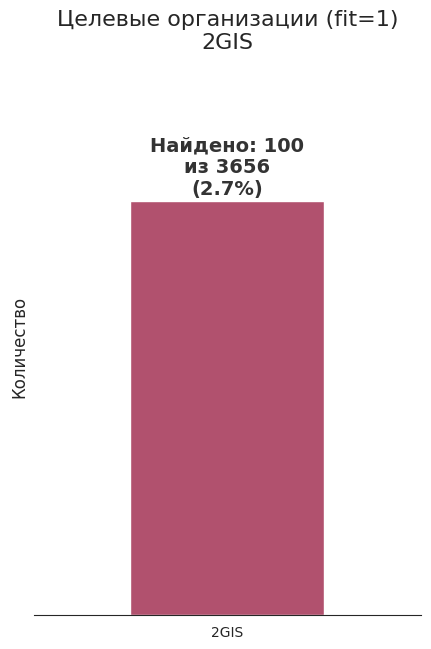

In [22]:
# Агрегация данных
platform_stats_2gis = df_2gis.groupby('platform')['fit'].agg(['count', 'sum']).reset_index()
platform_stats_2gis.columns = ['platform', 'total_obs', 'total_fits']
platform_stats_2gis['percentage'] = (platform_stats_2gis['total_fits'] / platform_stats_2gis['total_obs']) * 100

# Узкий вертикальный график
plt.figure(figsize=(5, 7))

barplot = sns.barplot(
    data=platform_stats_2gis, 
    x='platform', 
    y='total_fits', 
    hue='platform',
    palette='flare',  
    legend=False,
    width=0.5
)

sns.despine(left=True)

# Подписи: "Найдено / Всего (Процент%)"
for index, row in platform_stats_2gis.iterrows():
    label_text = f"Найдено: {int(row['total_fits'])}\nиз {int(row['total_obs'])}\n({row['percentage']:.1f}%)"
    
    barplot.text(
        index, 
        row['total_fits'] + 0.5, 
        label_text, 
        color='#333333', 
        ha="center", 
        va="bottom", 
        fontsize=14, 
        fontweight='bold'
    )

plt.title('Целевые организации (fit=1)\n2GIS', fontsize=16, pad=20)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('')
plt.yticks([]) 

# Адаптивный лимит высоты
top_limit = platform_stats_2gis['total_fits'].max() * 1.3
plt.ylim(0, max(top_limit, platform_stats_2gis['total_fits'].max() + 5))

plt.show()

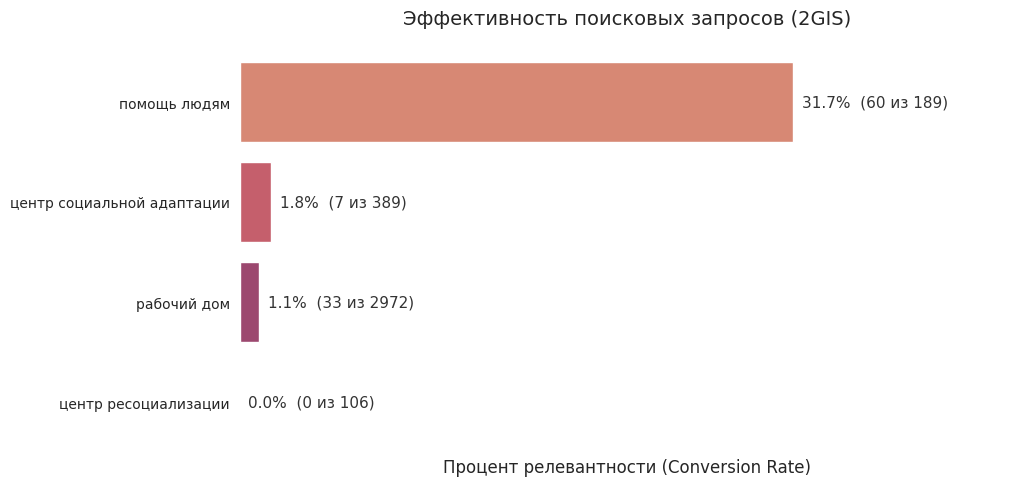

In [20]:
# Считаем статистику по запросам
query_stats_2gis = df_2gis.groupby('запрос')['fit'].agg(['mean', 'sum', 'count']).reset_index()
query_stats_2gis.columns = ['query', 'fit_rate', 'total_fits', 'total_obs']
query_stats_2gis['fit_percent'] = query_stats_2gis['fit_rate'] * 100

# Сортируем (лучшие сверху)
query_stats_2gis = query_stats_2gis.sort_values('fit_percent', ascending=False)

# Рисуем
plt.figure(figsize=(10, len(query_stats_2gis) * 0.8 + 2))

barplot = sns.barplot(
    data=query_stats_2gis,
    x='fit_percent',
    y='query',
    hue='query',
    palette='flare', 
    legend=False
)

sns.despine(left=True, bottom=True)

# Добавляем подробные подписи
for i, row in enumerate(query_stats_2gis.itertuples()):
    # Текст: "25.0% (5 из 20)"
    label = f"{row.fit_percent:.1f}%  ({int(row.total_fits)} из {int(row.total_obs)})"
    
    if row.fit_percent >= 0:
        plt.text(
            row.fit_percent + 0.5, 
            i, 
            label, 
            va='center', 
            fontsize=11,
            color='#333333',
            fontweight='medium'
        )

plt.title('Эффективность поисковых запросов (2GIS)', fontsize=14, pad=20)
plt.xlabel('Процент релевантности (Conversion Rate)', fontsize=12)
plt.ylabel('')
plt.xticks([]) 

# Раздвигаем границы справа для текста
plt.xlim(0, max(query_stats_2gis['fit_percent'].max() * 1.4, 10))

plt.show()

In [29]:
df_vk = pd.read_csv(
    'VK_fit_filled.csv', 
    sep=';',             
    quotechar='"',       
    engine='python',   
    on_bad_lines='skip'  
)

df_vk = df_vk.loc[:, ~df_vk.columns.str.contains('^Unnamed')]

# Предобработка 
if 'platform' not in df_vk.columns:
    df_vk['platform'] = 'VK'

df_vk['fit'] = pd.to_numeric(df_vk['fit'], errors='coerce').fillna(0)
rank_col = 'query answer number'
if rank_col in df_vk.columns:
    df_vk[rank_col] = pd.to_numeric(df_vk[rank_col], errors='coerce')

print(f"Всего строк: {len(df_vk)}")
display(df_vk.head())

Всего строк: 6091


,query answer number,search_query,date,author_type,author_link,phone,city,link,text,fit,platform
0,1,рабочий дом,14.02.2026,Человек,https://vk.com/id2177395,NaN,?,https://vk.com/wall2177395_100846,Как приготовить женщину \n(рецепт для мужчин н...,0,VK
1,2,рабочий дом,14.02.2026,Группа,https://vk.com/public233307506,NaN,?,https://vk.com/wall-233307506_369,Сегодня в многоквартирном доме по адресу: г. М...,0,VK
2,3,рабочий дом,14.02.2026,Человек,https://vk.com/id702288115,NaN,?,https://vk.com/wall702288115_16660,Сегодня в многоквартирном доме по адресу: г. М...,0,VK
3,4,рабочий дом,14.02.2026,Группа,https://vk.com/public223750878,NaN,?,https://vk.com/wall-223750878_112,Холода — не повод впадать в спячку! 🐻❄️\n\nМор...,0,VK
4,5,рабочий дом,14.02.2026,Группа,https://vk.com/public41633812,NaN,?,https://vk.com/wall-41633812_3576,скидка ламода промокод год 2026 год\n\nВ 2026 ...,0,VK


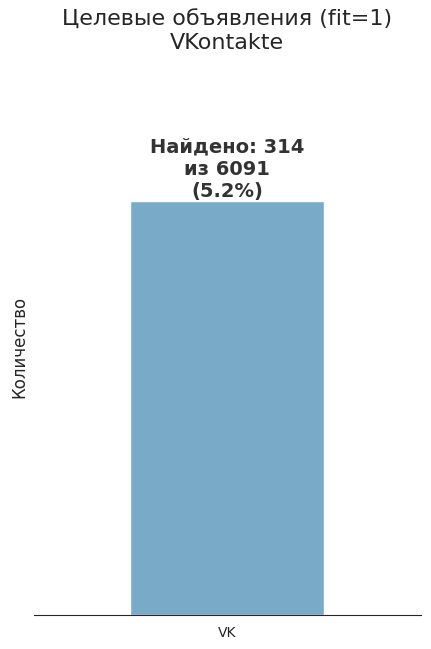

In [32]:
# Агрегация
platform_stats_vk = df_vk.groupby('platform')['fit'].agg(['count', 'sum']).reset_index()
platform_stats_vk.columns = ['platform', 'total_obs', 'total_fits']
platform_stats_vk['percentage'] = (platform_stats_vk['total_fits'] / platform_stats_vk['total_obs']) * 100

plt.figure(figsize=(5, 7))

barplot = sns.barplot(
    data=platform_stats_vk, 
    x='platform', 
    y='total_fits', 
    hue='platform',
    palette='Blues_r',   
    legend=False,
    width=0.5
)

sns.despine(left=True)

for index, row in platform_stats_vk.iterrows():
    label_text = f"Найдено: {int(row['total_fits'])}\nиз {int(row['total_obs'])}\n({row['percentage']:.1f}%)"
    
    barplot.text(
        index, 
        row['total_fits'] + 0.5, 
        label_text, 
        color='#333333', 
        ha="center", 
        va="bottom", 
        fontsize=14, 
        fontweight='bold'
    )

plt.title('Целевые объявления (fit=1)\nVKontakte', fontsize=16, pad=20)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('')
plt.yticks([]) 
plt.ylim(0, max(platform_stats_vk['total_fits'].max() * 1.3, platform_stats_vk['total_fits'].max() + 5))

plt.show()

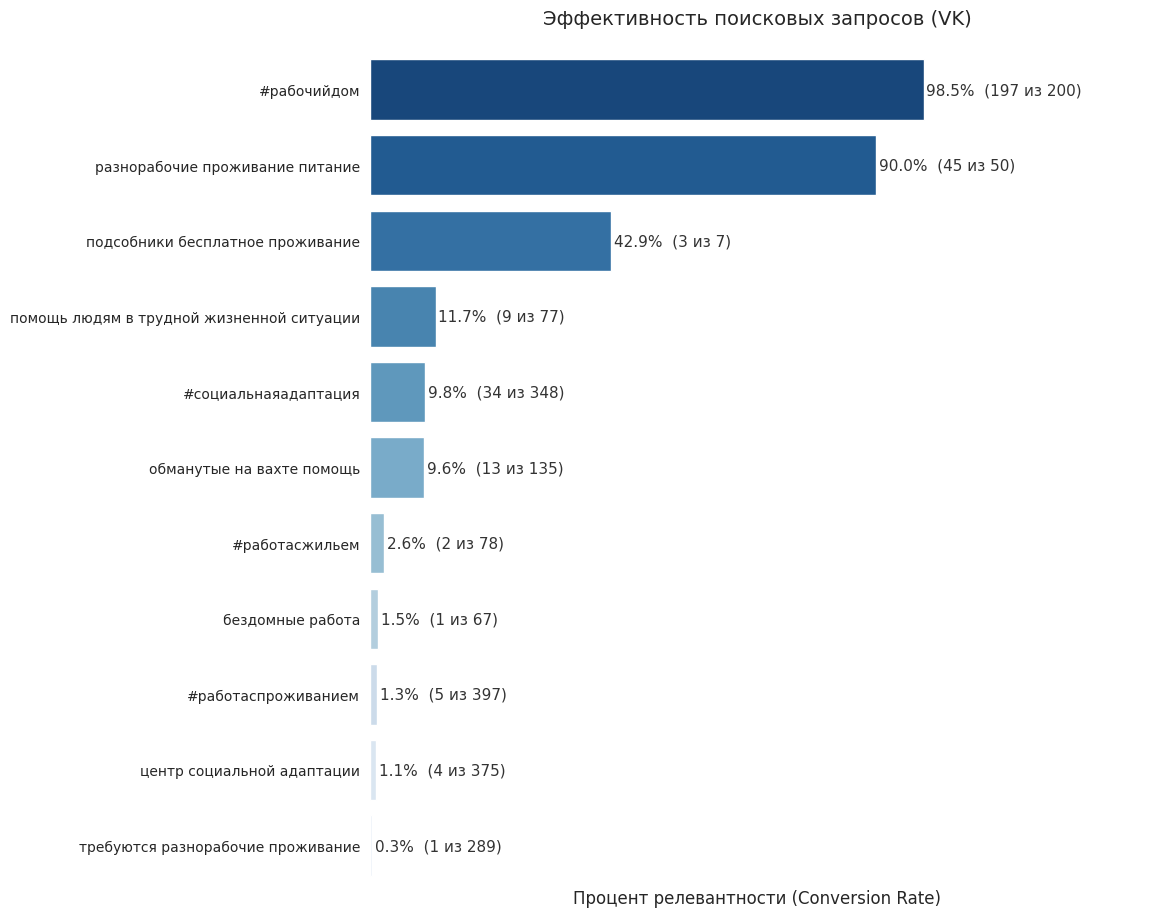

In [33]:
query_col = 'search_query' if 'search_query' in df_vk.columns else 'query'

# Считаем статистику
if query_col in df_vk.columns:
    query_stats_vk = df_vk.groupby(query_col)['fit'].agg(['mean', 'sum', 'count']).reset_index()
    query_stats_vk.columns = ['query', 'fit_rate', 'total_fits', 'total_obs']
    query_stats_vk['fit_percent'] = query_stats_vk['fit_rate'] * 100

    # Оставляем только те запросы, где нашли хотя бы 1 объявление
    query_stats_vk = query_stats_vk[query_stats_vk['total_fits'] > 0]

    # Сортируем
    query_stats_vk = query_stats_vk.sort_values('fit_percent', ascending=False)

    if len(query_stats_vk) > 0:
        plt.figure(figsize=(10, len(query_stats_vk) * 0.8 + 2))

        # Рисуем 
        barplot = sns.barplot(
            data=query_stats_vk,
            x='fit_percent',
            y='query',
            hue='query',
            palette='Blues_r',   
            legend=False
        )

        sns.despine(left=True, bottom=True)

        # Подписи
        for i, row in enumerate(query_stats_vk.itertuples()):
            label = f"{row.fit_percent:.1f}%  ({int(row.total_fits)} из {int(row.total_obs)})"
            
            plt.text(
                row.fit_percent + 0.5, 
                i, 
                label, 
                va='center', 
                fontsize=11,
                color='#333333', 
                fontweight='medium'
            )

        plt.title('Эффективность поисковых запросов (VK)', fontsize=14, pad=20)
        plt.xlabel('Процент релевантности (Conversion Rate)', fontsize=12)
        plt.ylabel('')
        plt.xticks([]) 
        plt.xlim(0, max(query_stats_vk['fit_percent'].max() * 1.4, 10))

        plt.show()
    else:
        print("Нет данных для отображения (ни по одному запросу не найдено fit=1).")

/tmp/ipykernel_93872/3588862200.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


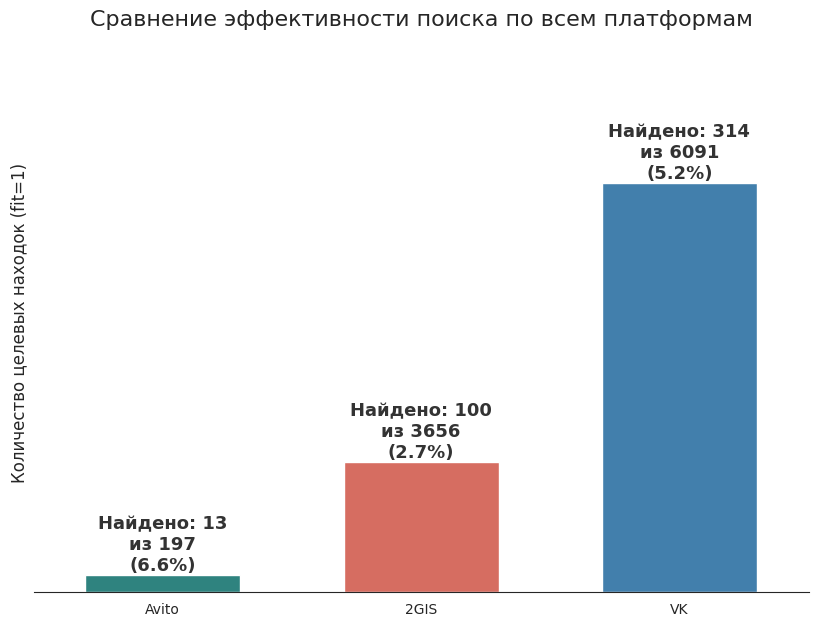

In [35]:
summary_data = []

# Avito (переменная df)
try:
    if 'df' in locals():
        fits = int(df['fit'].sum())
        total = len(df)
        summary_data.append({'Platform': 'Avito', 'Fits': fits, 'Total': total, 'Color': '#21918c'}) # Фиолетовый
except: pass

# 2GIS (переменная df_2gis)
try:
    if 'df_2gis' in locals():
        fits = int(df_2gis['fit'].sum())
        total = len(df_2gis)
        summary_data.append({'Platform': '2GIS', 'Fits': fits, 'Total': total, 'Color': '#e95d4e'}) # Оранжевый
except: pass

# VK (переменная df_vk)
try:
    if 'df_vk' in locals():
        fits = int(df_vk['fit'].sum())
        total = len(df_vk)
        summary_data.append({'Platform': 'VK', 'Fits': fits, 'Total': total, 'Color': '#3182bd'}) # Голубой
except: pass

# Создаем сводный DataFrame
df_summary = pd.DataFrame(summary_data)
df_summary['Percentage'] = (df_summary['Fits'] / df_summary['Total']) * 100

plt.figure(figsize=(10, 7))

# Словарь цветов для графика
palette = {row['Platform']: row['Color'] for i, row in df_summary.iterrows()}

barplot = sns.barplot(
    data=df_summary,
    x='Platform',
    y='Fits',
    palette=palette,
    width=0.6
)

sns.despine(left=True)


for index, row in df_summary.iterrows():
    # Текст: "Найдено: 15 / 100 (15.0%)"
    label_text = f"Найдено: {int(row['Fits'])}\nиз {int(row['Total'])}\n({row['Percentage']:.1f}%)"
    
    barplot.text(
        index, 
        row['Fits'] + 0.5, 
        label_text, 
        color='#333333', 
        ha="center", 
        va="bottom", 
        fontsize=13, 
        fontweight='bold'
    )

plt.title('Сравнение эффективности поиска по всем платформам', fontsize=16, pad=20)
plt.ylabel('Количество целевых находок (fit=1)', fontsize=12)
plt.xlabel('')
plt.yticks([]) 
plt.ylim(0, df_summary['Fits'].max() * 1.3 + 5)

plt.show()